In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Übung 1**

In [4]:
# 1. Importiere notwendige Bibliotheken und das Dataset
import pandas as pd
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

# Lade die Daten
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big_Data/Big_Data_Übungen/02_house_prices_clean.csv')

# Features und Zielvariable definieren (angenommen, die Zielvariable heißt 'SalePrice')
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [5]:
# 2. Trainiere das Modell mit LASSO Regression und einem passenden Alpha-Wert
alpha_value = 0.001  # Passe diesen Wert nach Bedarf an
lasso = Lasso(alpha=alpha_value)
lasso.fit(X, y)

# Erstelle ein DataFrame mit den Feature-Namen und deren LASSO-Koeffizienten
lasso_coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

In [13]:
# Wie viele Features wurden selektiert und wie viele ausgeschlossen?
# -> Anzahl Selektierten: 74
# -> Anzahl Ausgeschlossenen: 171

selected_features = lasso_coef[lasso_coef['Coefficient'] != 0].shape[0]
excluded_features = lasso_coef[lasso_coef['Coefficient'] == 0].shape[0]

print(f'Anzahl Selektierten: {selected_features}')
print(f'Anzahl Ausgeschlossenen: {excluded_features}')


Anzahl Selektierten: 74
Anzahl Ausgeschlossenen: 171


In [8]:

# BONUS: Visualisiere die 10 wichtigsten und die 10 unwichtigsten Features
# Sortiere die Koeffizienten nach ihrer Größe
lasso_coef_sorted = lasso_coef.sort_values(by='Coefficient', ascending=False)



In [9]:
# Zeige die 10 größten und 10 kleinsten Koeffizienten
top_10_features = lasso_coef_sorted.head(10)
bottom_10_features = lasso_coef_sorted.tail(10)


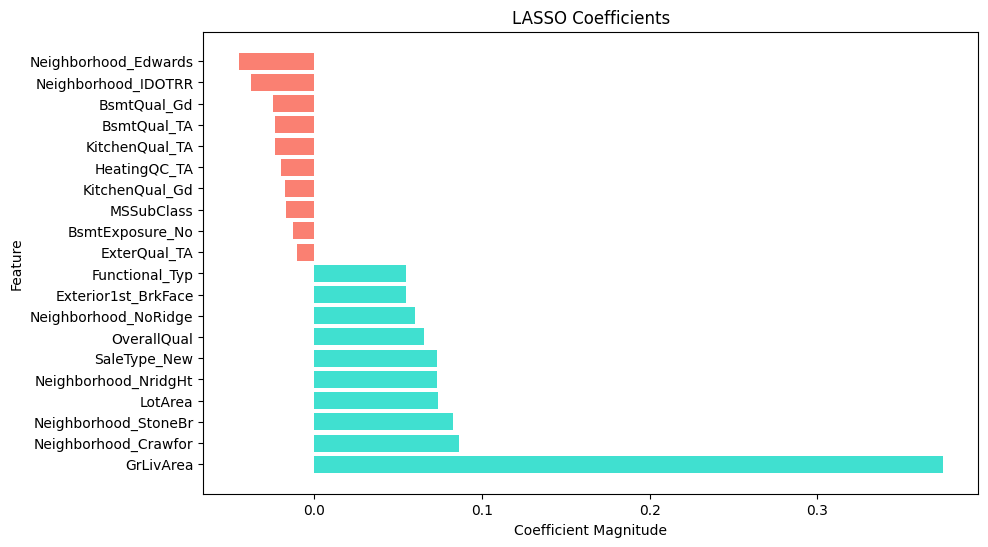

In [11]:
# Erstelle das Balkendiagramm
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Coefficient'], color='turquoise')
plt.barh(bottom_10_features['Feature'], bottom_10_features['Coefficient'], color='salmon')
plt.title('LASSO Coefficients')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()